In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
import scipy.stats as s
import pyodbc

In [2]:
df = pd.read_csv('ostateczna.csv', dtype={'NewUserId': str})

In [3]:
df2 = pd.read_csv('ostateczna2.csv', dtype={'NewUserId': str})

In [4]:
df3 = pd.read_csv('ostateczna3.csv', dtype={'NewUserId': str})

In [5]:
df.drop(['Unnamed: 0'],axis='columns', inplace=True)
df2.drop(['Unnamed: 0'],axis='columns', inplace=True)
df3.drop(['Unnamed: 0'],axis='columns', inplace=True)

In [6]:
df

NewUserId WasAddedToCart WasBought OpenSizeTab  \
0         629835214461368392          [{0}]     [{0}]       [{0}]   
1                    6156947          [{0}]     [{0}]       [{0}]   
2        6298370606872454516          [{0}]     [{0}]       [{0}]   
3        6298374081547046372          [{0}]     [{0}]       [{0}]   
4                   23438869          [{0}]     [{0}]       [{0}]   
...                      ...            ...       ...         ...   
1455988             14563067       [{0, 1}]     [{0}]       [{0}]   
1455989    99505086684061834          [{0}]     [{0}]       [{0}]   
1455990   995051316028061795          [{0}]     [{0}]       [{0}]   
1455991   995067112917890439          [{0}]     [{0}]       [{0}]   
1455992    99506800360300550          [{0}]     [{0}]       [{0}]   

        RegisterFlag SaleStatus  Child      S      M      L  ...  \
0              [{0}]   [{0, 1}]  [{0}]  [{0}]  [{0}]  [{0}]  ...   
1              [{1}]      [{1}]  [{0}]  [{0}]  [{0}]  [{0}]  ...   
2              [{0}]   [{0, 1}]  [{0}]  [{0}]  [{0}]  [{0}]  ...   
3              [{0}]      [{1}]  [{0}]  [{0}]  [{0}]  [{0}]  ...   
4              [{1}]   [{0, 1}]  [{0}]  [{0}]  [{0}]  [{0}]  ...   
...              ...        ...    ...    ...    ...    ...  ...   
1455988        [{1}]   [{0, 1}]  [{1}]  [{0}]  [{1}]  [{1}]  ...   
1455989        [{0}]      [{1}]  [{0}]  [{0}]  [{0}]  [{0}]  ...   
1455990        [{0}]      [{1}]  [{0}]  [{0}]  [{0}]  [{0}]  ...   
1455991        [{0}]      [{0}]  [{0}]  [{0}]  [{0}]  [{0}]  ...   
1455992        [{0}]      [{0}]  [{0}]  [{0}]  [{0}]  [{0}]  ...   

        FashionLevelSimple_best FashionLevelSimple_brak  \
0                      [{0, 1}]                   [{0}]   
1                         [{0}]                   [{0}]   
2                         [{0}]                   [{0}]   
3                         [{1}]                   [{0}]   
4                      [{0, 1}]                   [{0}]   
...                         ...                     ...   
1455988                [{0, 1}]                   [{0}]   
1455989                   [{0}]                   [{0}]   
1455990                   [{0}]                   [{0}]   
1455991                [{0, 1}]                   [{0}]   
1455992                [{0, 1}]                   [{0}]   

        FashionLevelSimple_core FashionLevelSimple_direct  \
0                      [{0, 1}]                     [{0}]   
1                         [{0}]                     [{0}]   
2                      [{0, 1}]                     [{0}]   
3                         [{0}]                     [{0}]   
4                      [{0, 1}]                     [{0}]   
...                         ...                       ...   
1455988                [{0, 1}]                  [{0, 1}]   
1455989                   [{1}]                     [{0}]   
1455990                   [{0}]                     [{1}]   
1455991                [{0, 1}]                     [{0}]   
1455992                [{0, 1}]                     [{0}]   

        FashionLevelSimple_inne Season_AW Season_SS ChangeImage_mysliciel  \
0                         [{0}]  [{0, 1}]  [{0, 1}]              [{0, 1}]   
1                         [{0}]     [{0}]     [{1}]                 [{0}]   
2                         [{0}]  [{0, 1}]  [{0, 1}]              [{0, 1}]   
3                         [{0}]     [{0}]     [{1}]                 [{0}]   
4                         [{0}]  [{0, 1}]  [{0, 1}]              [{0, 1}]   
...                         ...       ...       ...                   ...   
1455988                   [{0}]  [{0, 1}]  [{0, 1}]              [{0, 1}]   
1455989                   [{0}]     [{0}]     [{1}]                 [{0}]   
1455990                   [{0}]     [{0}]     [{1}]                 [{0}]   
1455991                   [{0}]     [{1}]     [{0}]                 [{0}]   
1455992                   [{0}]     [{1}]     [{0}]              [{0, 1}]   

      

In [10]:
df2

NewUserId     AvgTimeOnPage_sum ViewsCount_sum  \
0         629835214461368392  [223.97999999999996]           [14]   
1                    6156947                [3.21]            [1]   
2        6298370606872454516  [60.129999999999995]           [13]   
3        6298374081547046372               [31.62]            [1]   
4                   23438869  [114.28000000000002]           [18]   
...                      ...                   ...            ...   
1455989             14563067             [1100.37]           [61]   
1455990    99505086684061834                 [0.0]            [1]   
1455991   995051316028061795                [1.98]            [1]   
1455992   995067112917890439               [17.75]            [2]   
1455993    99506800360300550              [219.69]            [4]   

        ChangeImage_sum AccordionExpand_sum WasAddedToCart_sum WasBought_sum  
0                  [58]                 [0]                [0]           [0]  
1                   [2]                 [0]                [0]           [0]  
2                  [10]                 [0]                [0]           [0]  
3                   [0]                 [0]                [0]           [0]  
4                  [38]                 [0]                [0]           [0]  
...                 ...                 ...                ...           ...  
1455989           [146]                 [0]               [18]           [0]  
1455990             [0]                 [0]                [0]           [0]  
1455991             [3]                 [0]                [0]           [0]  
1455992             [5]                 [0]                [0]           [0]  
1455993             [9]                 [0]                [0]           [0]  

[1455994 rows x 7 columns]

In [8]:
df3

NewUserId    AvgTimeOnPage_mean       ViewsCount_mean  \
0         629835214461368392  [15.998571428571429]                   [1]   
1                    6156947                [3.21]                   [1]   
2        6298370606872454516                [8.59]  [1.8571428571428572]   
3        6298374081547046372               [31.62]                   [1]   
4                   23438869              [11.428]                 [1.8]   
...                      ...                   ...                   ...   
1455989             14563067  [22.456530612244897]  [1.2448979591836735]   
1455990    99505086684061834                 [0.0]                   [1]   
1455991   995051316028061795                [1.98]                   [1]   
1455992   995067112917890439               [8.875]                   [1]   
1455993    99506800360300550             [54.9225]                   [1]   

             ChangeImage_mean AccordionExpand_mean   WasAddedToCart_mean  \
0         [4.142857142857143]                  [0]                   [0]   
1                         [2]                  [0]                   [0]   
2        [1.4285714285714286]                  [0]                   [0]   
3                         [0]                  [0]                   [0]   
4                       [3.8]                  [0]                   [0]   
...                       ...                  ...                   ...   
1455989   [2.979591836734694]                  [0]  [0.3673469387755102]   
1455990                   [0]                  [0]                   [0]   
1455991                   [3]                  [0]                   [0]   
1455992                 [2.5]                  [0]                   [0]   
1455993                [2.25]                  [0]                   [0]   

        WasBought_mean  
0                  [0]  
1                  [0]  
2                  [0]  
3                  [0]  
4                  [0]  
...                ...  
1455989            [0]  
1455990            [0]  
1455991            [0]  
1455992            [0]  
1455993            [0]  

[1455994 rows x 7 columns]

In [11]:
kolumny=df.columns
for i in kolumny:
    df[i]=df[i].apply(lambda x: x.replace('{',''))
    df[i]=df[i].apply(lambda x: x.replace('}',''))
    df[i]=df[i].apply(lambda x: x.replace('[',''))
    df[i]=df[i].apply(lambda x: x.replace(']',''))
    df[i]=df[i].apply(lambda x: x.replace("'",""))

In [12]:
kolumny=df.columns
for i in kolumny[1:]:
    df[i] = [1 if i=='1' else (0 if i=='0' else 1 ) for i in df.loc[:,i]]

In [13]:
kolumny=df2.columns
for i in kolumny:
    df2[i]=df2[i].apply(lambda x: x.replace('[',''))
    df2[i]=df2[i].apply(lambda x: x.replace(']',''))

In [14]:
kolumny=df3.columns
for i in kolumny:
    df3[i]=df3[i].apply(lambda x: x.replace('[',''))
    df3[i]=df3[i].apply(lambda x: x.replace(']',''))

In [15]:
pd.set_option('display.max_columns', None)
df

NewUserId  WasAddedToCart  WasBought  OpenSizeTab  \
0         629835214461368392               0          0            0   
1                    6156947               0          0            0   
2        6298370606872454516               0          0            0   
3        6298374081547046372               0          0            0   
4                   23438869               0          0            0   
...                      ...             ...        ...          ...   
1455988             14563067               1          0            0   
1455989    99505086684061834               0          0            0   
1455990   995051316028061795               0          0            0   
1455991   995067112917890439               0          0            0   
1455992    99506800360300550               0          0            0   

         RegisterFlag  SaleStatus  Child  S  M  L  LIP  MIP  HIP  \
0                   0           1      0  0  0  0    1    1    1   
1                   1           1      0  0  0  0    0    1    0   
2                   0           1      0  0  0  0    1    1    0   
3                   0           1      0  0  0  0    0    0    1   
4                   1           1      0  0  0  0    1    1    1   
...               ...         ...    ... .. .. ..  ...  ...  ...   
1455988             1           1      1  0  1  1    1    1    1   
1455989             0           1      0  0  0  0    1    0    0   
1455990             0           1      0  0  0  0    0    1    0   
1455991             0           0      0  0  0  0    0    1    0   
1455992             0           0      0  0  0  0    0    1    1   

         AvgTimeOnPage_klikacz  AvgTimeOnPage_mysliciel  \
0                            0                        0   
1                            1                        0   
2                            1                        0   
3                            0                        0   
4                            1                        0   
...                        ...                      ...   
1455988                      1                        1   
1455989                      1                        0   
1455990                      1                        0   
1455991                      0                        0   
1455992                      1                        1   

         AvgTimeOnPage_przecietny  AvgTimeOnPage_zainteresowany  \
0                               1                             1   
1                               0                             0   
2                               1                             0   
3                               0                             1   
4                               1                             0   
...                           ...                           ...   
1455988                         1                             1   
1455989                         0                             0   
1455990                         0                             0   
1455991                         1                             0   
1455992                         0                             1   

         ViewsCount_klikacz  ViewsCount_mysliciel  ViewsCount_przecietny  \
0                         1                     0                      0   
1                         1                     0                      0   
2                         1                     0                      1   
3                         1                     0                      0   
4                         1                     0                      1   
...                     ...                   ...                    ...   
1455988                   1                     0                      1   
1455989                   1                     0                      0   
1455990                   1                     0                      0   
1455991                   1                     0              

In [22]:
df3=df3.round(2)

In [23]:
df2=df2.round(2)

In [24]:
df0=df2.merge(df3, how='left', on='NewUserId')

In [25]:
df=df.merge(df0, how='left', on='NewUserId')

In [26]:
kolumny=['NewUserId',
 'WasAddedToCart','WasAddedToCart_sum','WasAddedToCart_mean',
 'WasBought','WasBought_sum','WasBought_mean',
 'OpenSizeTab',
 'RegisterFlag',
 'SaleStatus',
 'Child',
 'S',
 'M',
 'L',
 'LIP',
 'MIP',
 'HIP',
 'AvgTimeOnPage_sum',
 'AvgTimeOnPage_mean',
 'AvgTimeOnPage_klikacz',
 'AvgTimeOnPage_mysliciel',
 'AvgTimeOnPage_przecietny',
 'AvgTimeOnPage_zainteresowany',
 'ViewsCount_sum',
 'ViewsCount_mean',
 'ViewsCount_klikacz',
 'ViewsCount_mysliciel',
 'ViewsCount_przecietny',
 'AccordionExpand_sum',
 'AccordionExpand_mean',
 'AccordionExpand_klikacz',
 'AccordionExpand_nieklikacz',
 'ChangeImage_sum',
 'ChangeImage_mean',
 'ChangeImage_mysliciel',
 'ChangeImage_nieklikacz',
 'ChangeImage_przecietny',
 'DepartmentName_accessories',
 'DepartmentName_kids',
 'DepartmentName_ladies',
 'DepartmentName_men',
 'Color_bialy',
 'Color_brazowy',
 'Color_czarny',
 'Color_czerwony',
 'Color_fioletowy',
 'Color_inne',
 'Color_niebieski',
 'Color_pastelowy',
 'Color_pomarancz',
 'Color_rozowy',
 'Color_szary',
 'Color_zielony',
 'Color_zolty',
 'FashionLevelSimple_basic',
 'FashionLevelSimple_best',
 'FashionLevelSimple_brak',
 'FashionLevelSimple_core',
 'FashionLevelSimple_direct',
 'FashionLevelSimple_inne',
 'Season_AW',
 'Season_SS']

In [27]:
pd.set_option('display.max_columns', None)
df = df[kolumny]
df

NewUserId  WasAddedToCart WasAddedToCart_sum  \
0         629835214461368392               0                  0   
1                    6156947               0                  0   
2        6298370606872454516               0                  0   
3        6298374081547046372               0                  0   
4                   23438869               0                  0   
...                      ...             ...                ...   
1455988             14563067               1                 18   
1455989    99505086684061834               0                  0   
1455990   995051316028061795               0                  0   
1455991   995067112917890439               0                  0   
1455992    99506800360300550               0                  0   

        WasAddedToCart_mean  WasBought WasBought_sum WasBought_mean  \
0                         0          0             0              0   
1                         0          0             0              0   
2                         0          0             0              0   
3                         0          0             0              0   
4                         0          0             0              0   
...                     ...        ...           ...            ...   
1455988  0.3673469387755102          0             0              0   
1455989                   0          0             0              0   
1455990                   0          0             0              0   
1455991                   0          0             0              0   
1455992                   0          0             0              0   

         OpenSizeTab  RegisterFlag  SaleStatus  Child  S  M  L  LIP  MIP  HIP  \
0                  0             0           1      0  0  0  0    1    1    1   
1                  0             1           1      0  0  0  0    0    1    0   
2                  0             0           1      0  0  0  0    1    1    0   
3                  0             0           1      0  0  0  0    0    0    1   
4                  0             1           1      0  0  0  0    1    1    1   
...              ...           ...         ...    ... .. .. ..  ...  ...  ...   
1455988            0             1           1      1  0  1  1    1    1    1   
1455989            0             0           1      0  0  0  0    1    0    0   
1455990            0             0           1      0  0  0  0    0    1    0   
1455991            0             0           0      0  0  0  0    0    1    0   
1455992            0             0           0      0  0  0  0    0    1    1   

          AvgTimeOnPage_sum  AvgTimeOnPage_mean  AvgTimeOnPage_klikacz  \
0        223.97999999999996  15.998571428571429                      0   
1                      3.21                3.21                      1   
2        60.129999999999995                8.59                      1   
3                     31.62               31.62                      0   
4        114.28000000000002              11.428                      1   
...                     ...                 ...                    ...   
1455988             1100.37  22.456530612244897                      1   
1455989                 0.0                 0.0                      1   
1455990                1.98                1.98                      1   
1455991               17.75               8.875                      0   
1455992              219.69             54.9225                      1   

         AvgTimeOnPage_mysliciel  AvgTimeOnPage_przecietny  \
0                              0                         1   
1                              0                         0   
2                              0                         1   
3                              0                         0   
4                              0                         1   
...                          ...                       ...   
1455988                        1                         1   
145

In [28]:
df.to_csv('modele.csv',index=True)

## Analiza nowych zmiennych

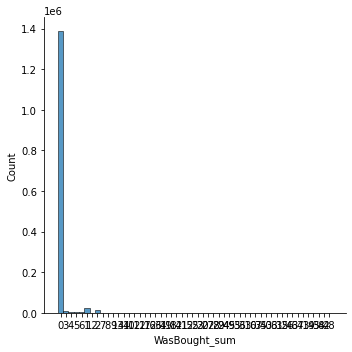

In [88]:
sns.displot(df['WasBought_sum']);

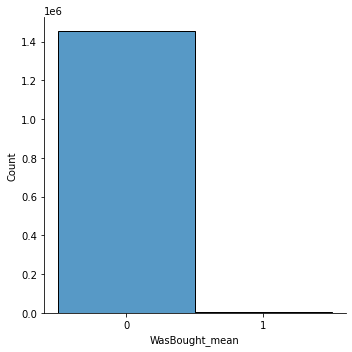

In [89]:
sns.displot(df['WasBought_mean']); #int(0.8)=0, więc zmienna średnio zakupiono nie ma sensu bo złe "zaokrąglenie"

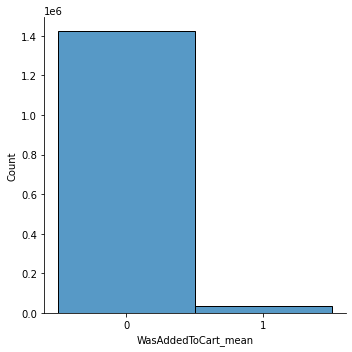

In [92]:
sns.displot(df['WasAddedToCart_mean']); #int(0.8)=0, więc zmienna średnio włożono do koszyka nie ma sensu bo złe "zaokrąglenie"

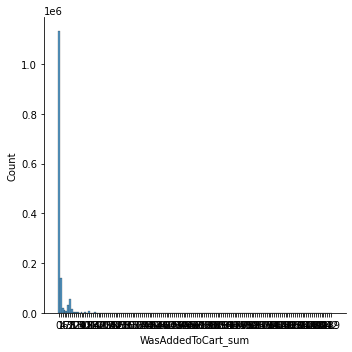

In [93]:
sns.displot(df['WasAddedToCart_sum']);

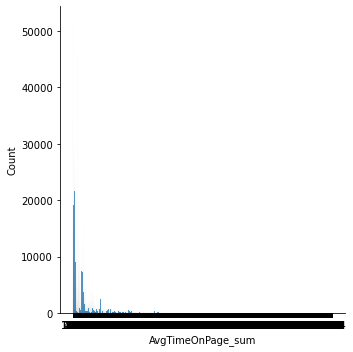

In [52]:
sns.displot(df['AvgTimeOnPage_sum']);

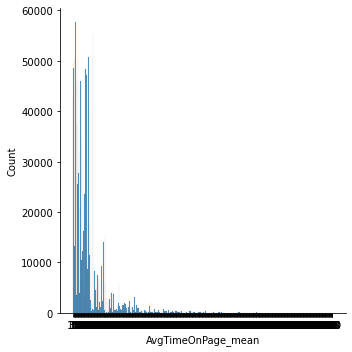

In [55]:
sns.displot(x=df['AvgTimeOnPage_mean']);

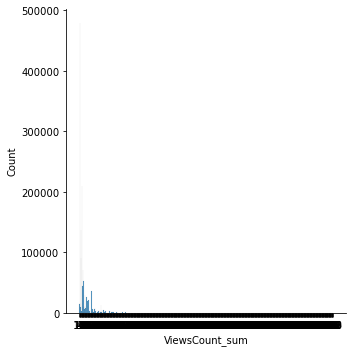

In [60]:
sns.displot(df['ViewsCount_sum']);

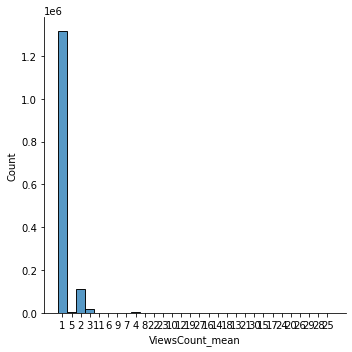

In [61]:
sns.displot(df['ViewsCount_mean']);

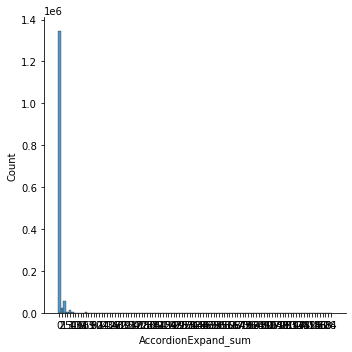

In [62]:
sns.displot(df['AccordionExpand_sum']);

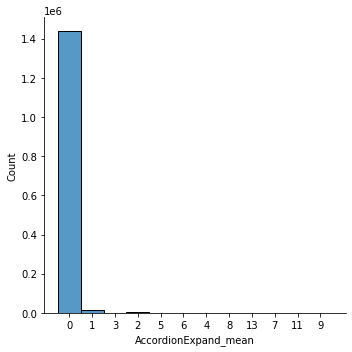

In [63]:
sns.displot(df['AccordionExpand_mean']);

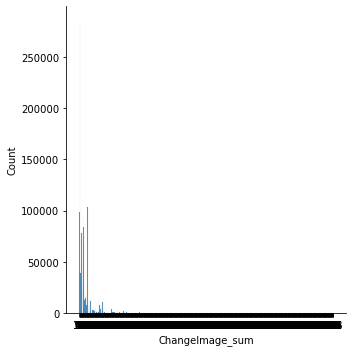

In [65]:
sns.displot(df['ChangeImage_sum']);

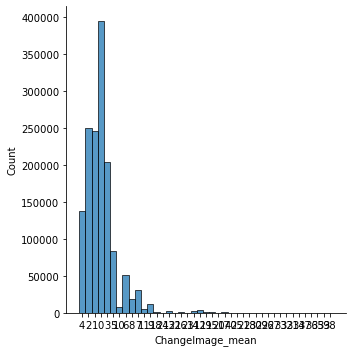

In [66]:
sns.displot(df['ChangeImage_mean']);

In [ ]:
sns.displot(df['ChangeImage_mean']);